* 1: Download the mushroom dataset

* 2: Create a new jupyter notebook

* 3: Load the dataset from CSV into pandas

* 4: Explore the distributions in the data. For example, how is habitat distributed between edibility vs non-edibility?

* 5: The data is entirely categorical. Convert each feature to dummy variables.

* 6: Visualise the feature space using a similar method to the one we used for the 20 newgroups dataset.
Your submission should be your Jupyter notebook, keep it short and concise.

In [1]:
import pandas as pd
data = pd.read_csv('agaricus-lepiota.data')
# Gets the first n rows
data.head(10)

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [2]:
# Task 4
# displays some basic statistical details of the dataset
data.describe()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


The dataset has 23 columns. The edibility column only has two different values, which indicates that it is a boolean. (e = edible). 4208 mushrooms are edible, and from this one can conclude that 3916 mushrooms are not edible. To find out how habitats are distributed between edibility and non-edibility, one would have two split the dataset.

In [3]:
data[["habitat", "edibility"]].groupby("habitat").describe().transpose()

habitat              d     g    l    m     p    u    w
edibility count   3148  2148  832  292  1144  368  192
          unique     2     2    2    2     2    2    1
          top        e     e    p    e     p    p    e
          freq    1880  1408  592  256  1008  272  192

By using the two columns "habitat" and "edibility", one can find out more about the distribution.

In [4]:
from tabulate import tabulate
tabulatedTable = [["Total", 3148, 2148, 832, 292, 1144, 368, 192], ["Edible", 1880, 1408, 832-592, 256, 1144-1008, 368-272, 192],
["Poisonous", 3148-1880, 2148-1408, 592, 292-256, 1008, 272, 192-192]]

print(tabulate(tabulatedTable, headers=["Habitat", "woods", "grasses", "leaves", "meadows", "paths", "urban", "waste"]))

Habitat      woods    grasses    leaves    meadows    paths    urban    waste
---------  -------  ---------  --------  ---------  -------  -------  -------
Total         3148       2148       832        292     1144      368      192
Edible        1880       1408       240        256      136       96      192
Poisonous     1268        740       592         36     1008      272        0


This new table shows us the distribution of edible mushrooms. In the "woods" biome, the number of edible mushrooms is the greatest out of any other biome. One can also see that if you find a mushroom, the chance of it being edible is highest in the "waste" biome.

In [5]:
# Task 5
# Convert categorical variable into dummy/indicator variables.
# In other words, it sets columns with a value to 1 and columns without a value to 0.
# Booleans are set to 1 for true and 0 for false
dummyData = pd.get_dummies(data)
dummyData
# Gets the first n rows
dummyData.head(10)

,edibility_e,edibility_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
5,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
6,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
8,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
9,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


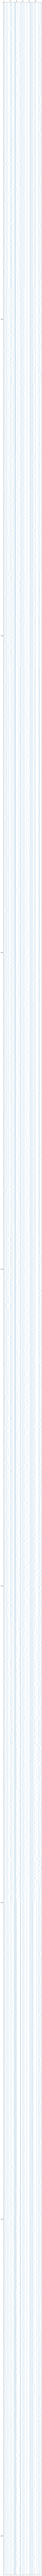

In [6]:
# Task 6
import matplotlib.pyplot as plt
plt.figure(figsize=(500,500)) 
plt.spy(dummyData, markersize=1) 
plt.show()